In [69]:
import numpy as np
import pandas as pd
import cv2
import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import load_model
from keras.models import Sequential
import enchant

import difflib

In [126]:
model = load_model('model.h5')
LB = LabelBinarizer()
train_Y = []
a_file = open("train_Y.txt", "r")
for line in a_file:
  stripped_line = line.strip()
  train_Y.append(stripped_line)
a_file.close()
val_Y = []
b_file = open("val_Y.txt", "r")
for line in b_file:
  stripped_line = line.strip()
  val_Y.append(stripped_line)
b_file.close()

In [127]:
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [128]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [129]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

In [163]:
def get_word(letter):
    prediction = "".join(letter)
    dictionary = enchant.Dict("en_US")
    if dictionary.check(prediction):
        return prediction, '\n100% match'
    else:
        sim = dict() 
        suggestions = set(dictionary.suggest(prediction))

        for word in suggestions:
            measure = difflib.SequenceMatcher(None, prediction, word).ratio()
            sim[measure] = word
        
        if not suggestions:
            return prediction, '\nUnrecognizable'
        elif len(suggestions) == 1:
            return prediction, "\nMost likely the word is:", sim[max(sim.keys())]
        else:
            return prediction, "\nMost likely the word is:", sim[max(sim.keys())], '\nAll suggestions', dictionary.suggest(prediction)

CROWN 
100% match


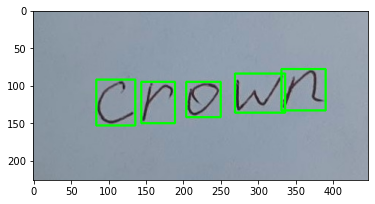

In [164]:
letter,image = get_letters("crown_bright.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

WORD 
100% match


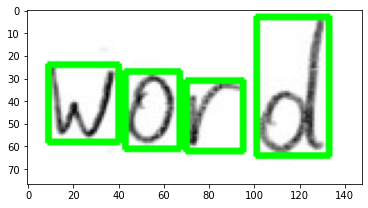

In [165]:
letter,image = get_letters("word.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

PTNFAPFUF 
Unrecognizable


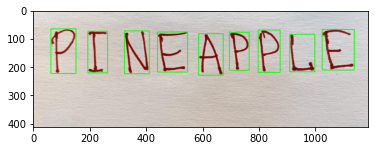

In [166]:
letter,image = get_letters("pineapple.jpeg")
word = get_word(letter)
print(*word)
plt.imshow(image)

HALLDWEEM 
Most likely the word is: HALLOWEEN


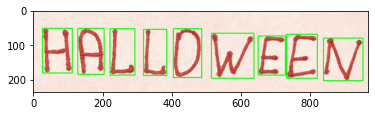

In [167]:
letter,image = get_letters("halloween.jpeg")
word = get_word(letter)
print(*word)
plt.imshow(image)

PELLETLER 
Most likely the word is: PELLETIER 
All suggestions ['PELLETIER', 'PELLETAL', 'PELLET', 'PROPELLER']


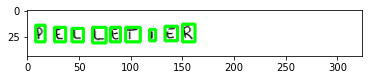

In [168]:
letter,image = get_letters("pelletier.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

AMTOFNE 
Most likely the word is: ATONEMENT


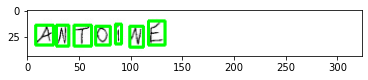

In [169]:
letter,image = get_letters("antoine.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

TESSA 
100% match


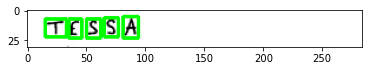

In [170]:
letter,image = get_letters("tessa.jpg")
word = get_word(letter)
print(*word)
plt.imshow(image)

TANU 
Most likely the word is: TA NU 
All suggestions ['TUNA', 'TAN', 'TAU', 'TANS', 'TANA', 'TANG', 'TANH', 'TANK', 'DANU', 'TA NU', 'TA-NU', 'TAN U']


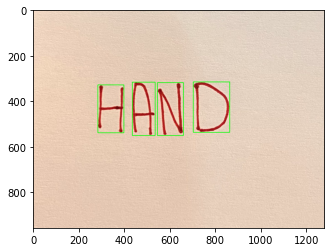

In [172]:
letter,image = get_letters("hand.jpeg")
word = get_word(letter)
print(*word)
plt.imshow(image)

TANU 
Most likely the word is: TA NU 
All suggestions ['TUNA', 'TAN', 'TAU', 'TANS', 'TANA', 'TANG', 'TANH', 'TANK', 'DANU', 'TA NU', 'TA-NU', 'TAN U']


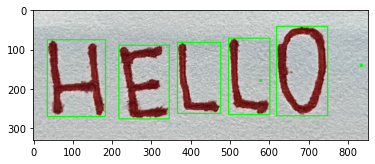

In [173]:
letter,image = get_letters("hello.jpeg")
wword = get_word(letter)
print(*word)
plt.imshow(image)